In [ ]:
!pip install tensorflow keras opencv-python matplotlib

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive (1).zip to archive (1).zip


In [ ]:
import zipfile
import os

# Unzip the uploaded file
with zipfile.ZipFile('archive (1).zip', 'r') as zip_ref:

    zip_ref.extractall('/content/waste_dataset')

In [ ]:
import os

# List folders
print(os.listdir('/content/waste_dataset'))

['DATASET', 'dataset']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/waste_dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/waste_dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse'
)


Found 50154 images belonging to 2 classes.
Found 50154 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models


base_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False


x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(4, activation='softmax')(x)


model = models.Model(inputs=base_model.input, outputs=x)


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, epochs=2, validation_data=validation_generator)

Epoch 1/2


Exception ignored in: <function _xla_gc_callback at 0x7d3422bc9800>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


1568/1568 ━━━━━━━━━━━━━━━━━━━━ 4883s 3s/step - accuracy: 0.4964 - loss: 0.7642 - val_accuracy: 0.5000 - val_loss: 0.6945
Epoch 2/2
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 4772s 3s/step - accuracy: 0.4977 - loss: 0.6950 - val_accuracy: 0.5000 - val_loss: 0.6956


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 984ms/step
The predicted waste category is: plastic


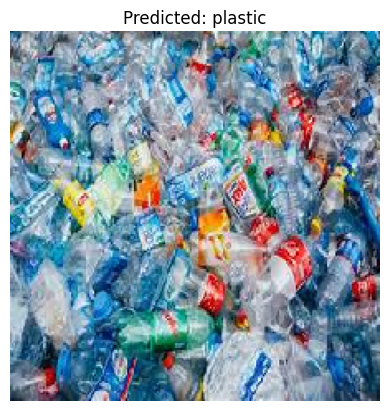

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models



base_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model.layers:
    layer.trainable = False


x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(4, activation='softmax')(x)


model = models.Model(inputs=base_model.input, outputs=x)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


def predict_waste(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0


    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions, axis=1)

    # Get class names
    class_names = ['plastic', 'metal', 'paper', 'organic']
    print(f"The predicted waste category is: {class_names[class_idx[0]]}")

    # Display the image
    plt.imshow(img)
    plt.title(f"Predicted: {class_names[class_idx[0]]}")
    plt.axis('off')
    plt.show()

# Test with new images
img_paths = ['/content/plastic.jpeg']  # List of image paths
# Loop through each image path and predict
for img_path in img_paths:
    predict_waste(img_path) # Call predict_waste with a single image path
